<a href="https://colab.research.google.com/github/kimdesok/3D-Mnist-3D-Convolution-3D-CNN/blob/main/VolatilityIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VIX Index
From Investopedia.com
>* Cboe Volatility Index(VIX) is a real time index that represents a market expecation of its volatilty over the coming 30 days. 
>* The VIX value of 30% means many investors expect that S&P 500 index may change in 30% of its value in the near future. 
>* It is used to evaluate the sentiment among traders including the level of fears, risks, stress, etc.



In [15]:
# matplotlib
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## FinanceDataReader

In [16]:
!pip install -q finance-datareader

## An Example
The stock price of Texas Instrument(TXN) showed a wider price swing compared to the one of Eli Lilly & Co.(LLY) (See the grayed area).  Thus, TXN had higher volatility than LLY over the one-month period.  

However, during July to Sept., LLY shows a much wider swing. Thus, LLY had higher volatility than TXN during this three-month period.

Volatility is supposed to measure such magnitude of price movements that a financial instrument experiences over a certain period of time. 

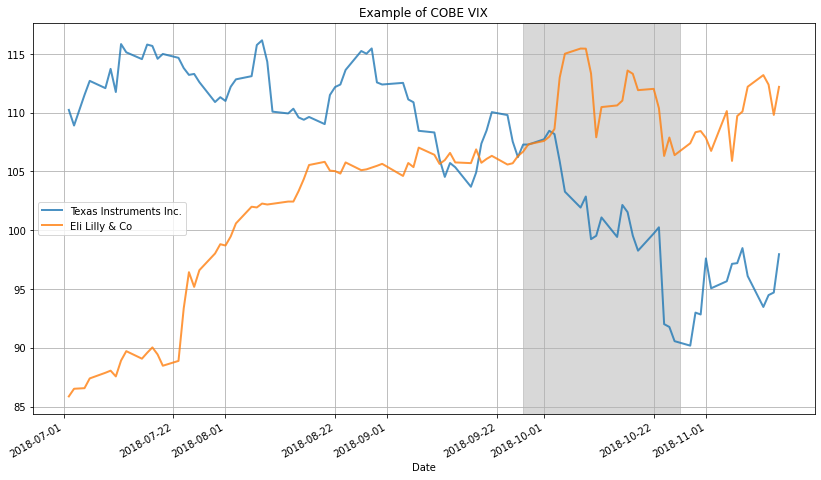

In [14]:
import FinanceDataReader as fdr
import pandas as pd

codes=[['Texas Instruments Inc.', 'TXN'], ['Eli Lilly & Co', 'LLY']]
df_list = [fdr.DataReader(code,'2018-07-01', '2018-11-15')['Close'] for name, code in codes]

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in codes] 
df.head(10)

ax = df.plot(lw=2, alpha=0.8, title='Example of COBE VIX')
ax.axvspan('2018-09-27', '2018-10-27', alpha=0.3, color='gray') 

Volatility is also measured by more subtle way, involving the option prices.  
Suppose we are experiencing a period of high volatility, we may seek a derivative instrument such as option to sustain the return.  In that case, a certain option prices may reach to higer levels.

## VIX data

Now we look at the volatility at the market level upon looking into its level at the indiviual equity.

One of the first indicators for the market volatility is known to be the Cboe VIX, representing the S&P 500 as market index.


In [38]:
codes=[['Volatility', 'VIX'], ['S&P 500', 'US500']]
df = fdr.DataReader('VIX','2006-01-01')['Close']
df1 = fdr.DataReader('US500','2006-01-01')['Close']
#print(df1.head())
df = pd.concat([df,df1], axis=1).dropna()
df.columns = [name for name, code in codes] 
print(df.head(10))

Date
2006-01-04    1273.46
2006-01-05    1273.48
2006-01-06    1285.45
2006-01-09    1290.15
2006-01-10    1289.69
Name: Close, dtype: float64
            Volatility  S&P 500
Date                           
2006-01-04       11.37  1273.46
2006-01-05       11.31  1273.48
2006-01-06       11.00  1285.45
2006-01-09       11.13  1290.15
2006-01-10       10.86  1289.69
2006-01-11       10.94  1294.18
2006-01-12       11.20  1286.06
2006-01-13       11.23  1287.61
2006-01-17       11.91  1283.03
2006-01-18       12.25  1277.93


Text(2020, 70, 'Pandemic')

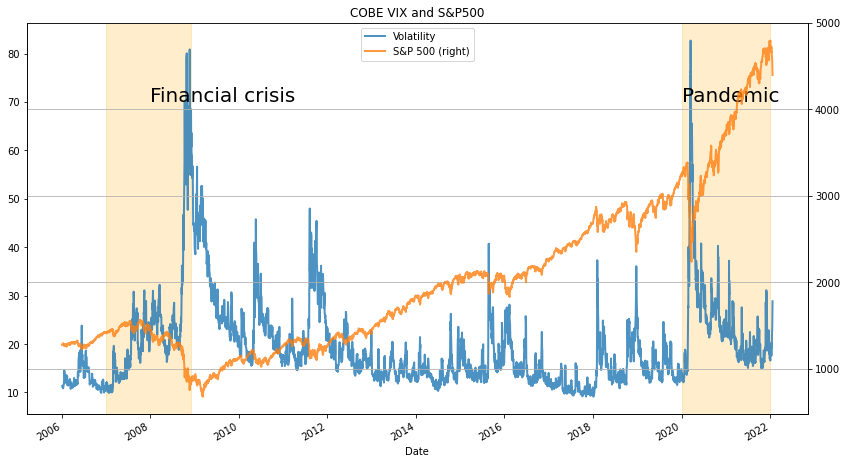

In [44]:
ax = df.plot(lw=2, alpha=0.8, title='COBE VIX and S&P500', secondary_y=['S&P 500'])
ax.axvspan('2007-01', '2008-12', color='orange', alpha=0.2)
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 
ax.axvspan('2020-01', '2022-01', color='orange', alpha=0.2)
ax.annotate('Pandemic', xy=('2020', 70), fontsize=20)

            Volatility  S&P 500
Date                           
2022-01-07       18.76  4677.02
2022-01-10       19.40  4670.29
2022-01-11       18.41  4713.07
2022-01-12       17.62  4726.35
2022-01-13       20.31  4659.02
2022-01-14       19.19  4662.85
2022-01-18       22.79  4577.34
2022-01-19       23.85  4532.76
2022-01-20       25.59  4482.73
2022-01-21       28.85  4397.93


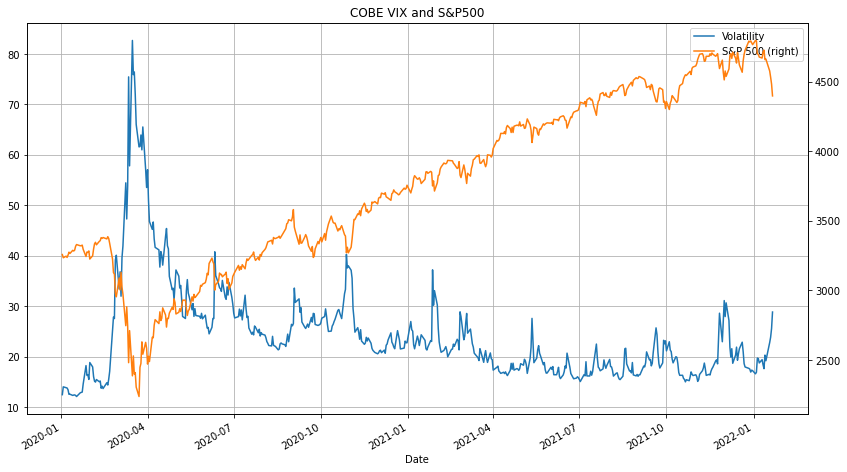

In [50]:
values = df['2020-01-01':'2022-01-22']
ax = values.plot(figsize=(14,8), grid=True, title='COBE VIX and S&P500', secondary_y=['S&P 500'])
plt.grid()
print(df.tail(10))

## VIX지수, S&P500지수, KOSPI지수 데이터

In [ ]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '2010-01-01', '2020-03-09') # S&P 500 VIX
kospi = fdr.DataReader('KS11', '2010-01-01', '2020-03-09') # KOSPI index
sp500 = fdr.DataReader('US500', '2010-01-01', '2020-03-09') # S&P 500 index

In [ ]:
import pandas as pd

df = pd.concat([vix['Close'], kospi['Close'], sp500['Close']], axis=1)
df.columns = ['VIX', 'KOSPI', 'S&P500']

## S&P500지수와 VIX지수

S&P500지수와 VIX지수는 서로 반대로 움직이는 것을 확인할 수 있습니다.

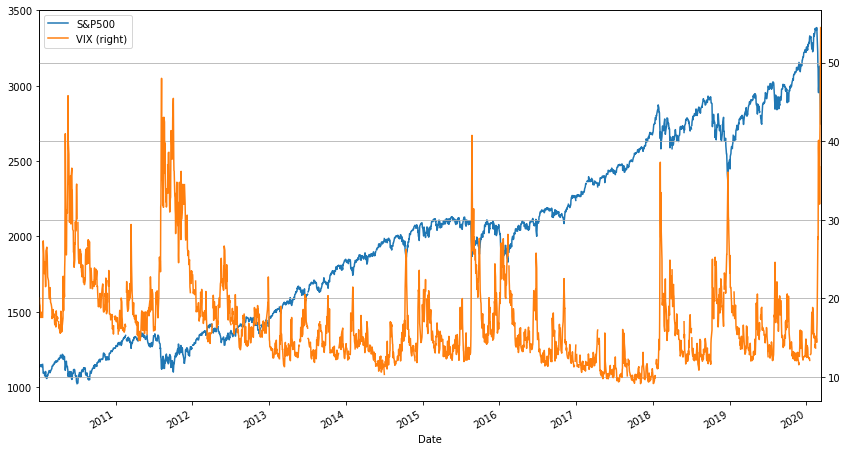

In [ ]:
df[['S&P500', 'VIX']].plot(secondary_y='VIX')

## KOSPI지수와 VIX지수

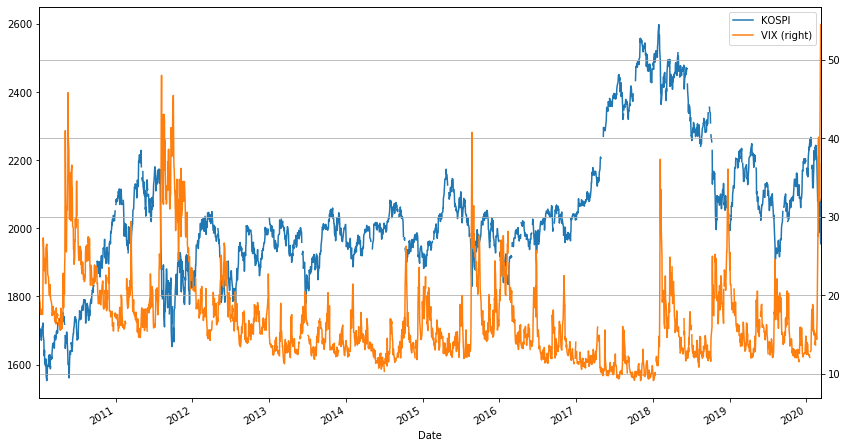

In [ ]:
df[['KOSPI', 'VIX']].plot(secondary_y='VIX')

## VIX지수, S&P500지수, KOSPI지수 상관관계

In [ ]:
df.corr()

,VIX,KOSPI,S&P500
VIX,1.000000,-0.514774,-0.439172
KOSPI,-0.514774,1.000000,0.704733
S&P500,-0.439172,0.704733,1.000000


KOSPI지수와 S&P500지수의 상관계수는 0.70으로 매우 높게 나타납니다.

VIX지수의 경우 S&P500지수와는 -0.439, KOSPI지수와는 -0.514로 역상관 관계가 나타납니다. VIX지수에 배팅한다는 것은 주식시장의 하락에 배팅을 한다는 의미가 됩니다.

## VIX 관련 종목
VIX 관련한 투자 가능한 종목들의 심볼과 가격들을 살펴봅니다.

### 국내 VIX관련 ETN
* `530065`: 삼성 S&P500 VIX S/T 선물 ETN(H) B 
* `500045`: 신한 S&P500 VIX S/T 선물 ETN B
* `550058`: QV S&P500 VIX S/T 선물 ETN B

#### 해외선물
* `VX`: S&P 500 VIX 선물 (해외선물)
 
#### 미국 ETF
* `VXX`: iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)
* `VIXY`: ProShares VIX Short-Term Futures ETF (NYSE)
* `VIXM`: ProShares VIX Mid-Term Futures ETF (NYSE)
* `VIIX`: VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)
* `VXZ`: iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)
* `XVZ`: iPath S&P 500 Dynamic VIX ETN (NYSE)
* `EVIX`: VelocityShares 1X Long VSTOXX Futures ETN  (NYSE)

`FinanceDataReader`를 통해 위 종목들의 가격 데이터를 모두 조회가 가능합니다.

## S&P 500 VIX 선물 (해외선물)

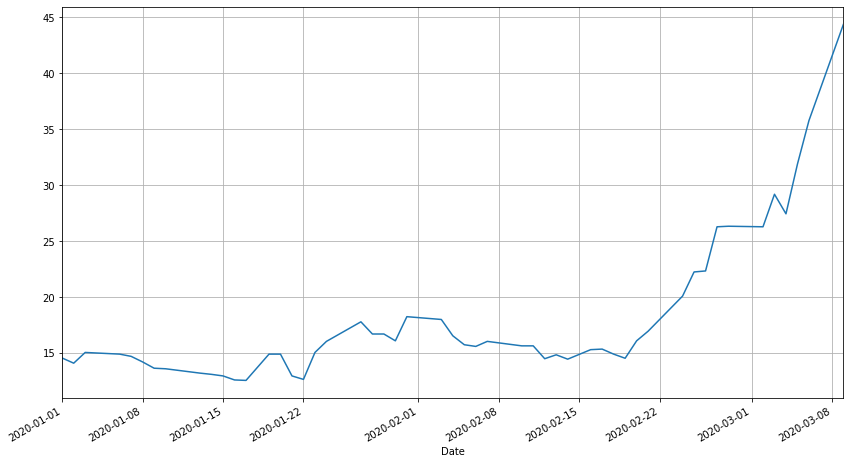

In [ ]:
fdr.DataReader('VX', '2020-01-01', '2020-03-09')['Close'].plot()

## 삼성 S&P500 VIX S/T 선물 ETN(H) B (530065)
국내 VIX와 연계된 ETN 종목 하나를 살펴봅니다.

삼성 S&P500 VIX S/T 선물 ETN(H) B (코스피)

https://finance.naver.com/item/main.nhn?code=530065


In [ ]:
fdr.DataReader('530065', '2020-01-01', '2020-03-09').tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-03,16395,17365,16310,17190,26338,0.020784
2020-03-04,18585,19000,17600,17775,35725,0.034031
2020-03-05,17750,18260,17750,18135,14610,0.020253
2020-03-06,19775,21385,19350,20975,40049,0.156603
2020-03-09,27220,27265,26225,27265,69397,0.299881


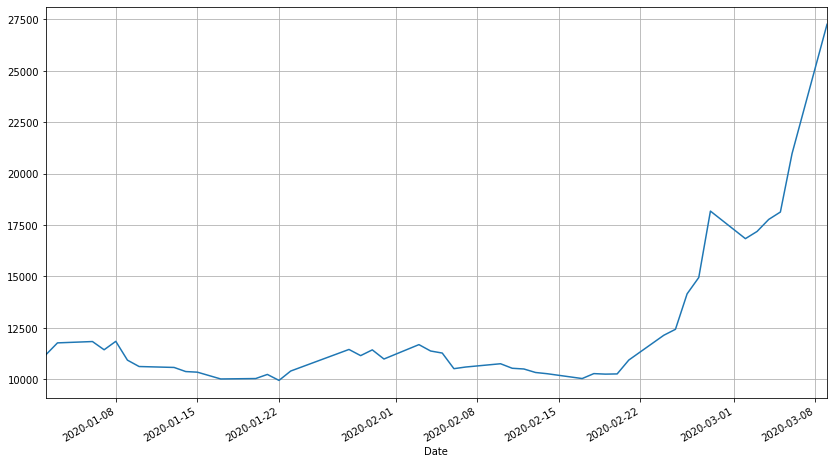

In [ ]:
fdr.DataReader('530065', '2020-01-01', '2020-03-09')['Close'].plot()

In [ ]:
price = fdr.DataReader('530065', '2020-01-01', '2020-03-09')['Close']

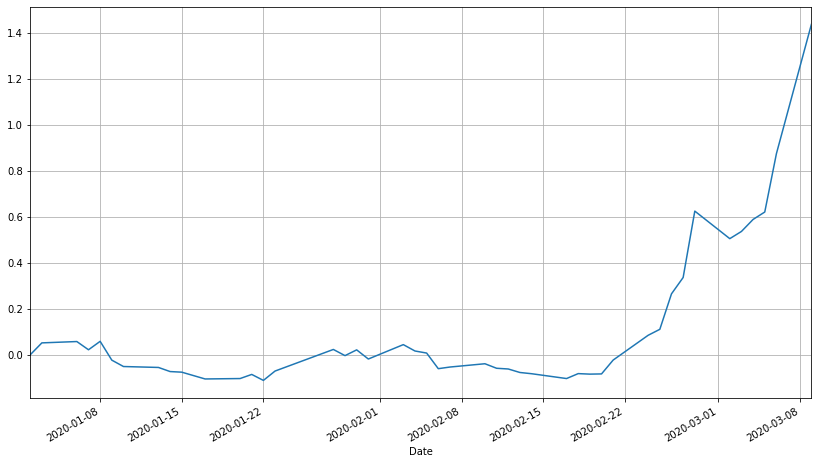

In [ ]:
returns = price / price[0] - 1.0
returns.plot()

In [ ]:
returns[-1]

1.436550491510277

530065 종목이 2020-03-09 상한가를 기록했습니다. 매우 이례적인 일입니다.

약 2개월 (2020-01-01 ~  2020-03-09) 수익률이 143.6% 입니다.

#### 2019~2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)